<a href="https://colab.research.google.com/github/wesleyorrr/Analise_Clientes_Supermercado/blob/main/analise_clientes_segmentacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 📦 1. Carregando os dados
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Criando o DataFrame com os dados dos clientes
dados = {
    'nome': ['Ana', 'Bruno', 'Carlos', 'Daniela', 'Eduardo', 'Fernanda', 'Gustavo', 'Helena', 'Igor', 'Juliana'],
    'idade': [23, 25, 31, 35, 45, 52, 46, 38, 29, 33],
    'renda': [2000, 2500, 3000, 4000, 6000, 7500, 5800, 4800, 2700, 3500],
    'gastos': [500, 600, 1200, 1000, 2000, 2500, 2200, 1800, 900, 1100]
}
df = pd.DataFrame(dados)

In [2]:
# 📊 2. Segmentação com KMeans
modelo = KMeans(n_clusters=2, random_state=42)
df['grupo'] = modelo.fit_predict(df[['idade', 'renda', 'gastos']])

In [3]:
# 📈 3. Cálculo de médias por grupo
medias = df.groupby('grupo')[['renda', 'gastos']].mean()
print("Média por grupo:\n", medias)

Média por grupo:
         renda       gastos
grupo                     
0      2950.0   883.333333
1      6025.0  2125.000000


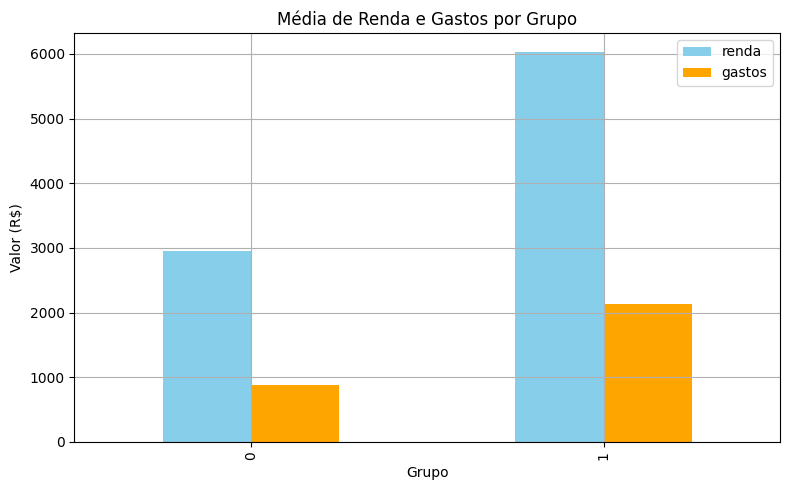

In [4]:
# 📊 4. Gráfico de barras das médias
medias.plot(kind='bar', figsize=(8, 5), color=['skyblue', 'orange'])
plt.title("Média de Renda e Gastos por Grupo")
plt.ylabel("Valor (R$)")
plt.xlabel("Grupo")
plt.grid(True)
plt.tight_layout()
plt.show()

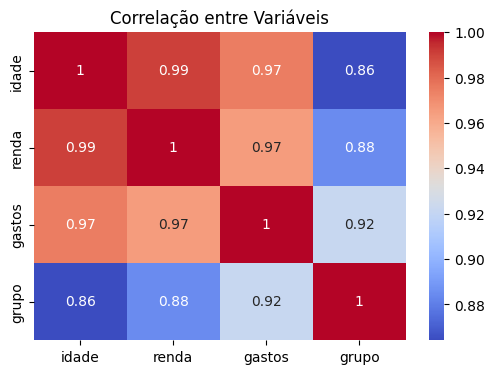

In [8]:
# Selecionando apenas colunas numéricas
numericas = df.select_dtypes(include='number')

# Agora sim o heatmap funciona
plt.figure(figsize=(6, 4))
sns.heatmap(numericas.corr(), annot=True, cmap='coolwarm')
plt.title("Correlação entre Variáveis")
plt.show()


In [7]:
# 🧾 6. Tabela final com a segmentação
print("\nTabela final com grupo de cada cliente:\n")
print(df[['nome', 'idade', 'renda', 'gastos', 'grupo']])


Tabela final com grupo de cada cliente:

       nome  idade  renda  gastos  grupo
0       Ana     23   2000     500      0
1     Bruno     25   2500     600      0
2    Carlos     31   3000    1200      0
3   Daniela     35   4000    1000      0
4   Eduardo     45   6000    2000      1
5  Fernanda     52   7500    2500      1
6   Gustavo     46   5800    2200      1
7    Helena     38   4800    1800      1
8      Igor     29   2700     900      0
9   Juliana     33   3500    1100      0
